In [247]:
import pandas as pd
import matplotlib.pyplot as plt

In [335]:
#CO2df contains all 7190 sorbents with CO2 
#mmolgdf contains CO2 capacities in mmol/g 3840 sorbents
mmolgdf=pd.read_csv('./CO2capmmolg.csv')
CO2df=pd.read_csv('./CO2df.csv')

In [336]:
#5269 datapoints 3840 with mmol/g unit or 73% of data 
CO2df[CO2df['temp_C']>0]['ads_units'].shape
CO2df["ads_units"].value_counts()

mmol/g                        3840
cm3(STP)/g                    1506
molecules/unitcell             350
mg/g                           293
wt%                            272
Multicomponent                 228
mmol/cm3                       130
cm3(STP)/cm3                   129
ml/g                            91
kg/mol                          49
mol/mol                         42
mol/l                           39
mol/g                           36
micromoles/m2                   35
g/l                             19
mol/m3                          16
g/g                             12
molecules/8 unit cells           9
kmol/m3                          9
g/cm3                            9
mmol/kg                          8
mg/m2                            8
molecules/cage                   6
molecules/formula unit           6
cm3/m2                           5
molecules/pore                   3
molecules/Rh2 unit               3
volume/volume                    3
molecules/Cu2 unit  

In [342]:
#tempdfcontains mmolgdf values greater than 0C and 0 capacity 
#contains no null values and contains 2850 values
#empdf['CO2_capacity (mmol/g)'].isnull().sum()
tempdf=mmolgdf[(mmolgdf['temp_C']>0) & (mmolgdf['CO2_capacity (mmol/g)']>0.01)].sort_values(by='CO2_capacity (mmol/g)', ascending=False).round(3)


In [343]:
#columns have incorrect capacity
tempdf=tempdf.drop(2232).drop(532).drop(2957).drop(2958).drop(3089)
#mg-mof-74 goes by numerous names
tempdf=tempdf.replace('CPO-27-Mg','Mg-MOF-74').replace('Mg2(dobdc)','Mg-MOF-74').replace('Mg-MOF-74 (3)'  ,'Mg-MOF-74')


In [322]:
#Top sorbents
tempdf[tempdf['CO2_capacity (mmol/g)']>=0.8]['adsorbent'].value_counts()

Mg-MOF-74                   59
Zeolite 13X                 26
PEI-25-APTES-25-PQCS2129    13
Zeolite 5A                  13
Ni-DOBDC                    11
                            ..
ZIF-79                       1
Ca-rho-MOF                   1
[Cu2(m-OH)2(bdim)]           1
Zn2(NDC)2(DPNI)              1
[MnIIMnIII(OH)Cl2(bbta)]     1
Name: adsorbent, Length: 134, dtype: int64

In [339]:
tempdf.columns[2]>=100

TypeError: '>=' not supported between instances of 'str' and 'int'

In [345]:
#tempdf=tempdf[tempdf['CO2_capacity (mmol/g)']>=0.8].drop(tempdf.columns[0],axis=1)
#tempdf.to_csv(r'./final.csv', index=False)
tempdf[tempdf['temp_C']>100].head()

,Unnamed: 0,DOI,isotherm_file,temp_C,adsorbent,CO2_capacity (mmol/g)
270,692,10.1007/s10450-013-9595-3,10.1007s10450-013-9595-3.isotherm24.json,300,Carbon,0.433
268,690,10.1007/s10450-013-9595-3,10.1007s10450-013-9595-3.isotherm22.json,300,Carbon,0.429
2066,3713,10.1021/Je800900a,10.1021Je800900a.Isotherm37.json,125,Zeolite 13X,0.421
269,691,10.1007/s10450-013-9595-3,10.1007s10450-013-9595-3.isotherm23.json,300,Carbon,0.411
2978,5452,10.1039/c1ee01720a,10.1039c1ee01720a.isotherm40.json,110,Mg-MOF-74,0.410


Text(0, 0.5, 'Counts')

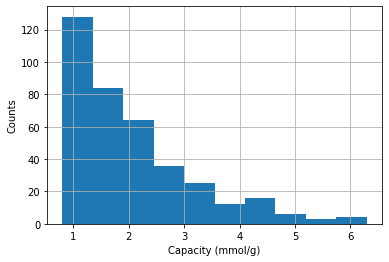

In [253]:
tempdf[tempdf['CO2_capacity (mmol/g)']>=0.8]['CO2_capacity (mmol/g)'].hist()
plt.xlabel('Capacity (mmol/g)')
plt.ylabel('Counts')
